## 1. Import data
### 1.1. Load related R functions

In [3]:
source("git@github.com:mora-lab/benchmarks/single-sample/R/applied_gsva_4methods.R")
source("git@github.com:mora-lab/benchmarks/single-sample/R/adjust_result_to_newstr.R")
source("git@github.com:mora-lab/benchmarks/single-sample/R/get_data_with_entrezID.R")
source("git@github.com:mora-lab/benchmarks/single-sample/R/get_pdata.R")
source("git@github.com:mora-lab/benchmarks/single-sample/R/heatmap_cluster_gsva.R")
install.packages("BiocManager")
BiocManager::install("Biobase")
BiocManager::install("GSVA")
BiocManager::install("GSVAdata")
library(Biobase)
library(GSVA)
library(GSVAdata)
library(pheatmap)
library(RColorBrewer)

### 1.2. Gene data

If you want to create the data frame by yourself, at first, download GSE_series_matrix in [GEO database](https://www.ncbi.nlm.nih.gov/geo/).
And then transform the ID and format by using `get_data_with_entrezID()` function to get the matrix objects, like `GSE10245_setentrez`.

In [4]:
load("~/.RData")

In [5]:
ls()

[1] "adjust_result_to_newstr"                
 [2] "applied_gsva_4methods"                  
 [3] "data_all"                               
 [4] "Disease_eSet_data"                      
 [5] "Disease_pathwaynames"                   
 [6] "Disease_setentrez_data"                 
 [7] "get_data_with_entrezID"                 
 [8] "get_expressionset_data"                 
 [9] "get_pdata"                              
[10] "get_setentrez"                          
[11] "GSE10245_setentrez"                     
[12] "GSE10245eSet"                           
[13] "GSE106986_setentrez"                    
[14] "GSE106986eSet"                          
[15] "GSE1122_setentrez"                      
[16] "GSE1122eSet"                            
[17] "GSE11906_setentrez"                     
[18] "GSE11906eSet"                           
[19] "GSE12472.1_setentrez"                   
[20] "GSE12472.1eSet"                         
[21] "GSE12472.2_setentrez"                   
[22] "GSE12472.2eSet"                         
[23] "GSE18842_setentrez"                     
[24] "GSE18842eSet"                           
[25] "GSE35571_setentrez"                     
[26] "GSE35571eSet"                           
[27] "GSE37768_setentrez"                     
[28] "GSE37768eSet"                           
[29] "GSE42057_setentrez"                     
[30] "GSE42057eSet"                           
[31] "GSE50834_setentrez"                     
[32] "GSE50834eSet"                           
[33] "GSE52819_setentrez"                     
[34] "GSE52819eSet"                           
[35] "H00079"                                 
[36] "H00079_Asthma"                          
[37] "H00079_Asthma_1"                        
[38] "H00342"                                 
[39] "H00342_Tuberculosis"                    
[40] "H00342_Tuberculosis_1"                  
[41] "H01103"                                 
[42] "H01103_Alpha_1_antitrypsin_deficiency"  
[43] "H01103_Alpha_1_antitrypsin_deficiency_1"
[44] "H01714"                                 
[45] "H01714_COPD"                            
[46] "H01714_COPD_1"                          
[47] "heatmap_cluster_gsva"                   
[48] "KEGG_genesetcollection"                 
[49] "KEGG_genesetlist"                       
[50] "KEGG_pathwaynamelist"                   
[51] "pheno_metadata"                         
[52] "read.gmt"                               
[53] "ref.pathways"                           
[54] "setentrez_data_disease"

### 1.3. Gene set data

The file is downloaded from [MSigDB](http://software.broadinstitute.org/gsea/msigdb/), named `c2.cp.kegg.v6.2.entrez.gmt`.

In [6]:
####Geneset file
library(GSEABase)
KEGG_genesetcollection = getGmt("git@github.com:mora-lab/benchmarks/single-sample/data/c2.cp.kegg.v6.2.entrez.gmt",
                           geneIdType = EntrezIdentifier(),
                           collectionType = BroadCollection(category="c2"))
KEGG_genesetcollection


KEGG_genesetlist = read.gmt("git@github.com:mora-lab/benchmarks/single-sample/data/c2.all.v6.2.entrez.gmt")
KEGG_genesetlist = KEGG_genesetlist[grep("^KEGG", names(KEGG_genesetlist))]
KEGG_pathwaynamelist = as.character(do.call(rbind, as.list(names(KEGG_genesetlist))))
#genesets = KEGG_genesetlist

GeneSetCollection
  names: KEGG_GLYCOLYSIS_GLUCONEOGENESIS, KEGG_CITRATE_CYCLE_TCA_CYCLE, ..., KEGG_VIRAL_MYOCARDITIS (186 total)
  unique identifiers: 55902, 2645, ..., 1981 (5266 total)
  types in collection:
    geneIdType: EntrezIdentifier (1 total)
    collectionType: BroadCollection (1 total)

In [8]:
#########################################
#####pathway data used in "pathifier"
pathwaynames = Disease_pathwaynames
# Generate a list that contains the previos two lists: genesets and their names
PATHWAYS = list()
PATHWAYS$gs = KEGG_genesetlist
PATHWAYS$pathwaynames = pathwaynames

##############data preparation
GSE10245_pdata = get_pdata("git@github.com:mora-lab/benchmarks/single-sample/data/GSE10245_pdata.csv")
GSE106986_pdata = get_pdata("git@github.com:mora-lab/benchmarks/single-sample/data/GSE106986_pdata.csv")
GSE1122_pdata = get_pdata("git@github.com:mora-lab/benchmarks/single-sample/data/GSE1122_pdata.csv")
GSE11906_pdata = get_pdata("git@github.com:mora-lab/benchmarks/single-sample/data/GSE11906_pdata.csv")
GSE12472.1_pdata =  get_pdata("git@github.com:mora-lab/benchmarks/single-sample/data/GSE12472(1)_pdata.csv")
GSE12472.2_pdata =  get_pdata("git@github.com:mora-lab/benchmarks/single-sample/data/GSE12472(2)_pdata.csv")
GSE18842_pdata = get_pdata("git@github.com:mora-lab/benchmarks/single-sample/data/GSE18842_pdata.csv")
###GSE25186_setentrez = get_setentrez("F:/lab_data/0. data/datasets/csv data/GSE25186_series_matrix.csv", "illuminaHumanv3.db")
GSE35571_pdata = get_pdata("git@github.com:mora-lab/benchmarks/single-sample/data/GSE35571_pdata.csv")
GSE37768_pdata = get_pdata("git@github.com:mora-lab/benchmarks/single-sample/data/GSE37768_pdata.csv")
GSE42057_pdata = get_pdata("git@github.com:mora-lab/benchmarks/single-sample/data/GSE42057_pdata.csv")
GSE50834_pdata = get_pdata("git@github.com:mora-lab/benchmarks/single-sample/data/GSE50834_pdata.csv")
GSE52819_pdata = get_pdata("git@github.com:mora-lab/benchmarks/single-sample/data/GSE52819_pdata.csv")


####function to get new data to be used in"pathifier"

get_new_data = function(pdata, setentrez){
  
  # Prepare data and parameters 
  # Extract information from binary phenotypes. 1 = Control, 0 = Disease
  normals = as.vector(as.logical(pdata$Normal))
  exp_matrix = as.matrix(setentrez)
  
  # Calculate MIN_STD
  New_exp_matrix = exp_matrix[,as.logical(normals)]
  nsd = apply(New_exp_matrix, 1, sd)
  min_std = quantile(nsd, 0.01)
  
  # Calculate MIN_EXP
  min_exp = quantile(as.vector(exp_matrix), 0.1) # Percentile 10 of data
  
  # Filter low value genes. At least 10% of samples with values over min_exp
  # Set expression levels < MIN_EXP to MIN_EXP
  greater = apply(exp_matrix, 1, function(x) x > min_exp)
  new_greater = apply(greater, 2, mean)
  new_greater = names(new_greater)[new_greater > 0.1]
  exp_matrix = exp_matrix[new_greater,]
  exp_matrix[exp_matrix < min_exp] = min_exp
  
  # Set maximum 5000 genes with more variance
  V = names(sort(apply(exp_matrix, 1, var), decreasing = T))#[1:10000]
  V = V[!is.na(V)]
  exp_matrix = exp_matrix[V,]
  genes = rownames(exp_matrix) # Checking genes
  allgenes = as.vector(rownames(exp_matrix))

  # Generate a list that contains previous data: gene expression, normal status,
  # and name of genes
  DATASET = list()
  DATASET$allgenes = allgenes
  DATASET$normals = normals
  DATASET$data = exp_matrix
  DATASET$min_std = min_std
  DATASET$min_exp = min_exp
  
  result = DATASET
}

new_GSE10245data = get_new_data(GSE10245_pdata, GSE10245_setentrez)
new_GSE106986data = get_new_data(GSE106986_pdata, GSE106986_setentrez)
new_GSE1122data = get_new_data( GSE1122_pdata,  GSE1122_setentrez)
new_GSE11906data = get_new_data(GSE11906_pdata, GSE11906_setentrez)
new_GSE12472.1data = get_new_data(GSE12472.1_pdata, GSE12472.1_setentrez)
new_GSE12472.2data = get_new_data(GSE12472.2_pdata, GSE12472.2_setentrez)
new_GSE18842data = get_new_data(GSE18842_pdata, GSE18842_setentrez)
#new_GSE35571data = get_new_data(GSE35571_pdata, GSE35571_setentrez)
new_GSE37768data = get_new_data(GSE37768_pdata, GSE37768_setentrez)
new_GSE42057data = get_new_data(GSE42057_pdata, GSE42057_setentrez)
new_GSE50834data = get_new_data(GSE50834_pdata, GSE50834_setentrez)
new_GSE52819data = get_new_data(GSE52819_pdata, GSE52819_setentrez)

In [9]:
# Generate a list that contains the names of the genesets used
H00014 = list("KEGG_NON_SMALL_LUNG_CANCER_H00014" = "KEGG_NON_SMALL_LUNG_CANCER",
              "KEGG_MAPK_SIGNALING_PATHWAY_H00014" = "KEGG_MAPK_SIGNALING_PATHWAY",
              "KEGG_ERBB_SIGNALING_PATHWAY_H00014" = "KEGG_ERBB_SIGNALING_PATHWAY",
              "KEGG_RAS_SIGNALING_PATHWAY_H00014" = "KEGG_RAS_SIGNALING_PATHWAY",
              "KEGG_CALCIUM_SIGNALING_PATHWAY_H00014" = "KEGG_CALCIUM_SIGNALING_PATHWAY",
              "KEGG_CELL_CYCLE_H00014" = "KEGG_CELL_CYCLE",
              "KEGG_P53_SIGNALING_PATHWAY_H00014" = "KEGG_P53_SIGNALING_PATHWAY",
              "KEGG_PI3K_AKT_SIGNALING_PATHWAY_H00014" = "KEGG_PI3K_AKT_SIGNALING_PATHWAY")
H01103 = list("KEGG_COMPLEMENT_AND_COAGULATION_CASCADES_H01103" = "KEGG_COMPLEMENT_AND_COAGULATION_CASCADES",
              "KEGG_INFLAMMATORY_MEDIATOR_REGULATION_OF_TRP_CHANNELS_H01103" = "KEGG_INFLAMMATORY_MEDIATOR_REGULATION_OF_TRP_CHANNELS",
              "KEGG_PLATELET_ACTIVATION_H01103" = "KEGG_PLATELET_ACTIVATION",
              "KEGG_B_CELL_RECEPTOR_SIGNALING_PATHWAY_H01103" = "KEGG_B_CELL_RECEPTOR_SIGNALING_PATHWAY")
H00079 = list("KEGG_ASTHMA_H00079" = "KEGG_ASTHMA",
              "KEGG_FC_EPSILON_RISIGNALING_PATHWAY_H00079" = "KEGG_FC_EPSILON_RISIGNALING_PATHWAY",
              "KEGG_B_CELL_RECEPTOR_SIGNALING_PATHWAY_H00079" = "KEGG_B_CELL_RECEPTOR_SIGNALING_PATHWAY",
              "KEGG_CELL_ADHESION_MOLECULES(CAMs)_H00079" = "KEGG_CELL_ADHESION_MOLECULES(CAMs)" ,
              "KEGG_T_CELL_RECEPTOR_SIGNALING_PATHWAY_H00079" = "KEGG_T_CELL_RECEPTOR_SIGNALING_PATHWAY",
              "KEGG_ANTIGEN_PROCESSING_AND_PRESENTATION_H00079" = "KEGG_ANTIGEN_PROCESSING_AND_PRESENTATION",
              "KEGG_CYTOKINE_CYTOKINE_RECEPTOR_INTERACTION_H00079" = "KEGG_CYTOKINE_CYTOKINE_RECEPTOR_INTERACTION",
              "KEGG_JAK_STAT_SIGNALING_PATHWAY_H00079" = "KEGG_JAK_STAT_SIGNALING_PATHWAY")
H00342 = list("KEGG_TUBERCULOSIS_H00342" = "KEGG_TUBERCULOSIS",
              "KEGG_APOPTOSIS_H00342" = "KEGG_APOPTOSIS",
              "KEGG_ANTIGEN_PROCESSING_AND_PRESENTATION_H00342" = "KEGG_ANTIGEN_PROCESSING_AND_PRESENTATION",
              "KEGG_JAK_STAT_SIGNALING_PATHWAY_H00342" = "KEGG_JAK_STAT_SIGNALING_PATHWAY",
              "KEGG_MAPK_SIGNALING_PATHWAY_H00342" = "KEGG_MAPK_SIGNALING_PATHWAY",
              "KEGG_TOLL_LIKERECEPTOR_SIGNALING_PATHWAY_H00342" = "KEGG_TOLL_LIKERECEPTOR_SIGNALING_PATHWAY",
              "KEGG_NOD_LIKE_RECEPTOR_SIGNALING_PATHWAY_H00342" = "KEGG_NOD_LIKE_RECEPTOR_SIGNALING_PATHWAY")
H01714 = list("KEGG_CITRATE_CYCLE_TCA_CYCLE_H01714" = "KEGG_CITRATE_CYCLE_TCA_CYCLE", 
              "KEGG_HEDGEHOG_SIGNALING_PATHWAY_H01714" = "KEGG_HEDGEHOG_SIGNALING_PATHWAY",
              "KEGG_WNT_SIGNALING_PATHWAY_H01714 " = "KEGG_WNT_SIGNALING_PATHWAY",
              "KEGG_PI3K_AKT_SIGNALING_PATHWAY_H01714" = "KEGG_PI3K_AKT_SIGNALING_PATHWAY", 
              "KEGG_B_CELL_RECEPTOR_SIGNALING_PATHWAY_H01714" = "KEGG_B_CELL_RECEPTOR_SIGNALING_PATHWAY",
              "KEGG_TGF_BETA_SIGNALING_PATHWAY_H01714" = "KEGG_TGF_BETA_SIGNALING_PATHWAY", 
              "KEGG_ECM_RECEPTOR_INTERACTION_H01714" = "KEGG_ECM_RECEPTOR_INTERACTION ",
              "KEGG_FOCAL_ADHESION_H01714" = "KEGG_FOCAL_ADHESION ",
              "KEGG_VEGF_SIGNALING_PATHWAY_H01714" = "KEGG_VEGF_SIGNALING_PATHWAY",
              "KEGG_SPHINGOLIPID_METABOLISM_H01714 " = "KEGG_SPHINGOLIPID_METABOLISM ",
              "KEGG_NOTCH_SIGNALING_PATHWAY_H01714" = "KEGG_NOTCH_SIGNALING_PATHWAY",
              "KEGG_ERBB_SIGNALING_PATHWAY_H01714" = "KEGG_ERBB_SIGNALING_PATHWAY",
              "KEGG_ABC_TRANSPORTERS_H01714" = "KEGG_ABC_TRANSPORTERS", 
              "KEGG_CELL_ADHESION_MOLECULES_CAMS_H01714" = "KEGG_CELL_ADHESION_MOLECULES_CAMS",
              "KEGG_CELL_CYCLE_H01714" = "KEGG_CELL_CYCLE ",
              "KEGG_OOCYTE_MEIOSIS_H01714 " = "KEGG_OOCYTE_MEIOSIS ",
              "KEGG_APOPTOSIS_H01714"= "KEGG_APOPTOSIS", 
              "KEGG_P53_SIGNALING_PATHWAY_H01714" = "KEGG_P53_SIGNALING_PATHWAY",
              "KEGG_HOMOLOGOUS_RECOMBINATION_H01714"= "KEGG_HOMOLOGOUS_RECOMBINATION",
              "KEGG_BASE_EXCISION_REPAIR_H01714" = "KEGG_BASE_EXCISION_REPAIR",
              "KEGG_NUCLEOTIDE_EXCISION_REPAIR_H01714" = "KEGG_NUCLEOTIDE_EXCISION_REPAIR",
              " KEGG_MISMATCH_REPAIR_H01714 " =" KEGG_MISMATCH_REPAIR", 
              "KEGG_NON_HOMOLOGOUS_END_JOINING_H01714"  = "KEGG_NON_HOMOLOGOUS_END_JOINING", 
              "KEGG_ENDOCYTOSIS_H01714" = "KEGG_ENDOCYTOSIS",
              "KEGG_LYSOSOME_H01714" = "KEGG_LYSOSOME",
              "KEGG_PEROXISOME_H01714 "="KEGG_PEROXISOME ",
              "KEGG_SNARE_INTERACTIONS_IN_VESICULAR_TRANSPORT_H01714" = "KEGG_SNARE_INTERACTIONS_IN_VESICULAR_TRANSPORT",
              "KEGG_VASCULAR_SMOOTH_MUSCLE_CONTRACTION_H01714" = "KEGG_VASCULAR_SMOOTH_MUSCLE_CONTRACTION", 
              "KEGG_REGULATION_OF_ACTIN_CYTOSKELETON_H01714 " = "KEGG_REGULATION_OF_ACTIN_CYTOSKELETON ",
              "KEGG_OXIDATIVE_PHOSPHORYLATION_H01714" = "KEGG_OXIDATIVE_PHOSPHORYLATION" ,
              "KEGG_UBIQUITIN_MEDIATED_PROTEOLYSIS_H01714"= "KEGG_UBIQUITIN_MEDIATED_PROTEOLYSIS",
              "KEGG_CYTOKINE_CYTOKINE_RECEPTOR_INTERACTION_H01714" = "KEGG_CYTOKINE_CYTOKINE_RECEPTOR_INTERACTION",
              "KEGG_ADIPOCYTOKINE_SIGNALING_PATHWAY_H01714" = "KEGG_ADIPOCYTOKINE_SIGNALING_PATHWAY",
              "KEGG_MAPK_SIGNALING_PATHWAY_H01714" = "KEGG_MAPK_SIGNALING_PATHWAY",
              "KEGG_TUBERCULOSIS_H01714" = "KEGG_TUBERCULOSIS",
              "KEGG_PENTOSE_PHOSPHATE_PATHWAY_H01714" = "KEGG_PENTOSE_PHOSPHATE_PATHWAY",
              "KEGG_HEMATOPOIETIC_CELL_LINEAGE_H01714"  = "KEGG_HEMATOPOIETIC_CELL_LINEAGE",
              "KEGG_COMPLEMENT_AND_COAGULATION_CASCADES_H01714 " = "KEGG_COMPLEMENT_AND_COAGULATION_CASCADES ",
              "KEGG_TOLL_LIKE_RECEPTOR_SIGNALING_PATHWAY_H01714" = "KEGG_TOLL_LIKE_RECEPTOR_SIGNALING_PATHWAY",
              "KEGG_NOD_LIKE_RECEPTOR_SIGNALING_PATHWAY_H01714" = "KEGG_NOD_LIKE_RECEPTOR_SIGNALING_PATHWAY" ,
              "KEGG_RIG_I_LIKE_RECEPTOR_SIGNALING_PATHWAY_H01714" = "KEGG_RIG_I_LIKE_RECEPTOR_SIGNALING_PATHWAY",
              "KEGG_CYTOSOLIC_DNA_SENSING_PATHWAY_H01714"= "KEGG_CYTOSOLIC_DNA_SENSING_PATHWAY",
              "KEGG_NATURAL_KILLER_CELL_MEDIATED_CYTOTOXICITY_H01714" = "KEGG_NATURAL_KILLER_CELL_MEDIATED_CYTOTOXICITY",
              "KEGG_ANTIGEN_PROCESSING_AND_PRESENTATION_H01714" = "KEGG_ANTIGEN_PROCESSING_AND_PRESENTATION",
              "KEGG_T_CELL_RECEPTOR_SIGNALING_PATHWAY_H01714" = "KEGG_T_CELL_RECEPTOR_SIGNALING_PATHWAY ",
              "KEGG_FC_EPSILON_RI_SIGNALING_PATHWAY_H01714" = "KEGG_FC_EPSILON_RI_SIGNALING_PATHWAY",
              "KEGG_FC_GAMMA_R_MEDIATED_PHAGOCYTOSIS_H01714 " = "KEGG_FC_GAMMA_R_MEDIATED_PHAGOCYTOSIS",
              "KEGG_LEUKOCYTE_TRANSENDOTHELIAL_MIGRATION_H01714" = "KEGG_LEUKOCYTE_TRANSENDOTHELIAL_MIGRATION", 
              "KEGG_INTESTINAL_IMMUNE_NETWORK_FOR_IGA_PRODUCTION_H01714" = "KEGG_INTESTINAL_IMMUNE_NETWORK_FOR_IGA_PRODUCTION",
              "KEGG_CHEMOKINE_SIGNALING_PATHWAY_H01714" = "KEGG_CHEMOKINE_SIGNALING_PATHWAY")
Disease_pathwaynames = list(H00014,H01103,H00079,H00342,H01714)

####target.pathway

target.pathway_H00014 = Disease_pathwaynames[[1]]
target.pathway_H01103 = Disease_pathwaynames[[2]]
target.pathway_H00079 = Disease_pathwaynames[[3]]
target.pathway_H00342 = Disease_pathwaynames[[4]]
target.pathway_H01714 = Disease_pathwaynames[[5]]


## 2. Apply using methods

### 2.1 Get result of 4 methods

In [10]:
###results of each dataset
r1 = applied_gsva_4methods(GSE10245_setentrez, KEGG_genesetcollection)
r2 = applied_gsva_4methods(GSE106986_setentrez, KEGG_genesetcollection)
r3 = applied_gsva_4methods(GSE1122_setentrez, KEGG_genesetcollection)
r4 = applied_gsva_4methods(GSE11906_setentrez, KEGG_genesetcollection)
## r5 = applied_gsva_4methods(GSE12472.1_setentrez, KEGG_genesetcollection)
## r6 = applied_gsva_4methods(GSE12472.2_setentrez, KEGG_genesetcollection)
r7 = applied_gsva_4methods(GSE18842_setentrez, KEGG_genesetcollection)
r9 = applied_gsva_4methods(GSE35571_setentrez, KEGG_genesetcollection)
r10 = applied_gsva_4methods(GSE37768_setentrez, KEGG_genesetcollection)
## r11 = applied_gsva_4methods(GSE42057_setentrez, KEGG_genesetcollection)

Estimating GSVA scores for 186 gene sets.
Computing observed enrichment scores
Estimating ECDFs with Gaussian kernels
Using parallel with 1 cores
  |======================================================================| 100%
Estimating PLAGE scores for 186 gene sets.
  |                                                                      |   0%Using parallel with 1 cores
  |======================================================================| 100%
Estimating ssGSEA scores for 186 gene sets.
  |                                                                      |   0%Using parallel with 1 cores
  |======================================================================| 100%
Estimating combined z-scores for 186 gene sets.
  |                                                                      |   0%Using parallel with 1 cores
  |======================================================================| 100%
Estimating GSVA scores for 186 gene sets.
Computing observed enrichment scores

Warning message in .local(expr, gset.idx.list, ...):
"673 genes with constant expression values throuhgout the samples."Warning message in .local(expr, gset.idx.list, ...):
"Since argument method!="ssgsea", genes with constant expression values are discarded."

Estimating GSVA scores for 185 gene sets.
Computing observed enrichment scores
Estimating ECDFs with Gaussian kernels
Using parallel with 1 cores
  |======================================================================| 100%


Warning message in .local(expr, gset.idx.list, ...):
"673 genes with constant expression values throuhgout the samples."Warning message in .local(expr, gset.idx.list, ...):
"Since argument method!="ssgsea", genes with constant expression values are discarded."

Estimating PLAGE scores for 185 gene sets.
  |                                                                      |   0%Using parallel with 1 cores
  |======================================================================| 100%


Warning message in .local(expr, gset.idx.list, ...):
"673 genes with constant expression values throuhgout the samples."

Estimating ssGSEA scores for 185 gene sets.
  |                                                                      |   0%Using parallel with 1 cores
  |======================================================================| 100%


Warning message in .local(expr, gset.idx.list, ...):
"673 genes with constant expression values throuhgout the samples."Warning message in .local(expr, gset.idx.list, ...):
"Since argument method!="ssgsea", genes with constant expression values are discarded."

Estimating combined z-scores for 185 gene sets.
  |                                                                      |   0%Using parallel with 1 cores
  |======================================================================| 100%
Estimating GSVA scores for 186 gene sets.
Computing observed enrichment scores
Estimating ECDFs with Gaussian kernels
Using parallel with 1 cores
  |======================================================================| 100%
Estimating PLAGE scores for 186 gene sets.
  |                                                                      |   0%Using parallel with 1 cores
  |======================================================================| 100%
Estimating ssGSEA scores for 186 gene sets.
  |                                                                      |   0%Using parallel with 1 cores
  |======================================================================| 100%
Estimating combined z-scores for 186 gene sets.
  |                           

In [11]:
r12 = applied_gsva_4methods(GSE50834_setentrez, KEGG_genesetcollection)
r13 = applied_gsva_4methods(GSE52819_setentrez, KEGG_genesetcollection)

Estimating GSVA scores for 186 gene sets.
Computing observed enrichment scores
Estimating ECDFs with Gaussian kernels
Using parallel with 1 cores
  |======================================================================| 100%
Estimating PLAGE scores for 186 gene sets.
  |                                                                      |   0%Using parallel with 1 cores
  |======================================================================| 100%
Estimating ssGSEA scores for 186 gene sets.
  |                                                                      |   0%Using parallel with 1 cores
  |======================================================================| 100%
Estimating combined z-scores for 186 gene sets.
  |                                                                      |   0%Using parallel with 1 cores
  |======================================================================| 100%
Estimating GSVA scores for 186 gene sets.
Computing observed enrichment scores

### 2.2 combine datasets due to the disease

In [12]:
cluster_H00014 = list("GSE10245" = r1, "GSE18842" = r7) # GSE12472.1" = r5,"GSE12472.2" = r6
cluster_H01103 = list("GSE1122" = r3)
cluster_H00079 = list("GSE35571" = r9)
cluster_H00342 = list("GSE50834" = r12,"GSE52819" = r13)
cluster_H01714 = list("GSE106986" = r2,"GSE11906" = r4,"GSE37768" = r10)   # ,"GSE42057" = r11)

In [13]:
str(cluster_H00014)

List of 2
 $ GSE10245:List of 4
  ..$ result.ssgsea: num [1:186, 1:58] 0.284 0.423 0.321 0.156 0.286 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:186] "KEGG_GLYCOLYSIS_GLUCONEOGENESIS" "KEGG_CITRATE_CYCLE_TCA_CYCLE" "KEGG_PENTOSE_PHOSPHATE_PATHWAY" "KEGG_PENTOSE_AND_GLUCURONATE_INTERCONVERSIONS" ...
  .. .. ..$ : chr [1:58] "GSM258551" "GSM258552" "GSM258553" "GSM258554" ...
  ..$ result.plage : num [1:186, 1:58] -0.2359 -0.0935 0.1306 -0.3238 -0.2023 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:186] "KEGG_GLYCOLYSIS_GLUCONEOGENESIS" "KEGG_CITRATE_CYCLE_TCA_CYCLE" "KEGG_PENTOSE_PHOSPHATE_PATHWAY" "KEGG_PENTOSE_AND_GLUCURONATE_INTERCONVERSIONS" ...
  .. .. ..$ : chr [1:58] "GSM258551" "GSM258552" "GSM258553" "GSM258554" ...
  ..$ result.gsva  : num [1:186, 1:58] -0.311 -0.456 -0.423 -0.236 -0.481 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:186] "KEGG_GLYCOLYSIS_GLUCONEOGENESIS" "KEGG_CITRATE_CYCLE_TCA_CYCLE" "KEGG_PENTOSE_PHOSPHA

### 2.3 Adjusting the structure of the result

In [14]:
try_H00014 = adjust_result_to_newstr(cluster_H00014)
try_H00342 = adjust_result_to_newstr(cluster_H00342)
try_H01103 = adjust_result_to_newstr(cluster_H01103)
try_H00079 = adjust_result_to_newstr(cluster_H00079)
try_H01714 = adjust_result_to_newstr(cluster_H01714)

In [15]:
str(try_H00014)

List of 4
 $ result.ssgsea: num [1:186, 1:146] 0.284 0.423 0.321 0.156 0.286 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:186] "KEGG_GLYCOLYSIS_GLUCONEOGENESIS" "KEGG_CITRATE_CYCLE_TCA_CYCLE" "KEGG_PENTOSE_PHOSPHATE_PATHWAY" "KEGG_PENTOSE_AND_GLUCURONATE_INTERCONVERSIONS" ...
  .. ..$ : chr [1:146] "GSM258551" "GSM258552" "GSM258553" "GSM258554" ...
 $ result.plage : num [1:186, 1:146] 0.284 0.423 0.321 0.156 0.286 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:186] "KEGG_GLYCOLYSIS_GLUCONEOGENESIS" "KEGG_CITRATE_CYCLE_TCA_CYCLE" "KEGG_PENTOSE_PHOSPHATE_PATHWAY" "KEGG_PENTOSE_AND_GLUCURONATE_INTERCONVERSIONS" ...
  .. ..$ : chr [1:146] "GSM258551" "GSM258552" "GSM258553" "GSM258554" ...
 $ result.gsva  : num [1:186, 1:146] 0.284 0.423 0.321 0.156 0.286 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:186] "KEGG_GLYCOLYSIS_GLUCONEOGENESIS" "KEGG_CITRATE_CYCLE_TCA_CYCLE" "KEGG_PENTOSE_PHOSPHATE_PATHWAY" "KEGG_PENTOSE_AND_GLUCURONATE_INTERCONVERSIONS" ...


### 2.4. Results of "Pathifier"

In [ ]:
###5.method:pathifier
get_pathifier_result = function(new_gsedata, PATHWAYS){
  result = quantify_pathways_deregulation(new_gsedata$data,
                                          new_gsedata$allgenes,
                                          PATHWAYS$gs,
                                          PATHWAYS$pathwaynames,
                                          new_gsedata$normals,
                                          # maximize_stability = T,
                                          attempts = 100,
                                          min_std = new_gsedata$min_std,
                                          min_exp = new_gsedata$min_exp)
  
  result
}

###results
result.pathifier_GSE10245 = get_pathifier_result(new_GSE10245data, PATHWAYS)
result.pathifier_GSE106986 = get_pathifier_result(new_GSE106986data, PATHWAYS)
result.pathifier_GSE1122 = get_pathifier_result(new_GSE1122data, PATHWAYS)
result.pathifier_GSE11906 = get_pathifier_result(new_GSE11906data, PATHWAYS)
result.pathifier_GSE12472.1 = get_pathifier_result(new_GSE12472.1data, PATHWAYS)
result.pathifier_GSE12472.2 = get_pathifier_result(new_GSE12472.2data, PATHWAYS)
result.pathifier_GSE18842 = get_pathifier_result(new_GSE18842data, PATHWAYS)
# result.pathifier_GSE35571 = get_pathifier_result(new_GSE35571data, PATHWAYS)
result.pathifier_GSE37768 = get_pathifier_result(new_GSE37768data, PATHWAYS)
result.pathifier_GSE42057 = get_pathifier_result(new_GSE42057data, PATHWAYS)
result.pathifier_GSE50834 = get_pathifier_result(new_GSE50834data, PATHWAYS)
result.pathifier_GSE52819 = get_pathifier_result(new_GSE52819data, PATHWAYS)

## 3. Clustering via heatmap_"GSVA"

In [16]:
p_H00014 = list()
p_H00342 = list()
p_H01103 = list()
p_H00079 = list()
p_H01714 = list()

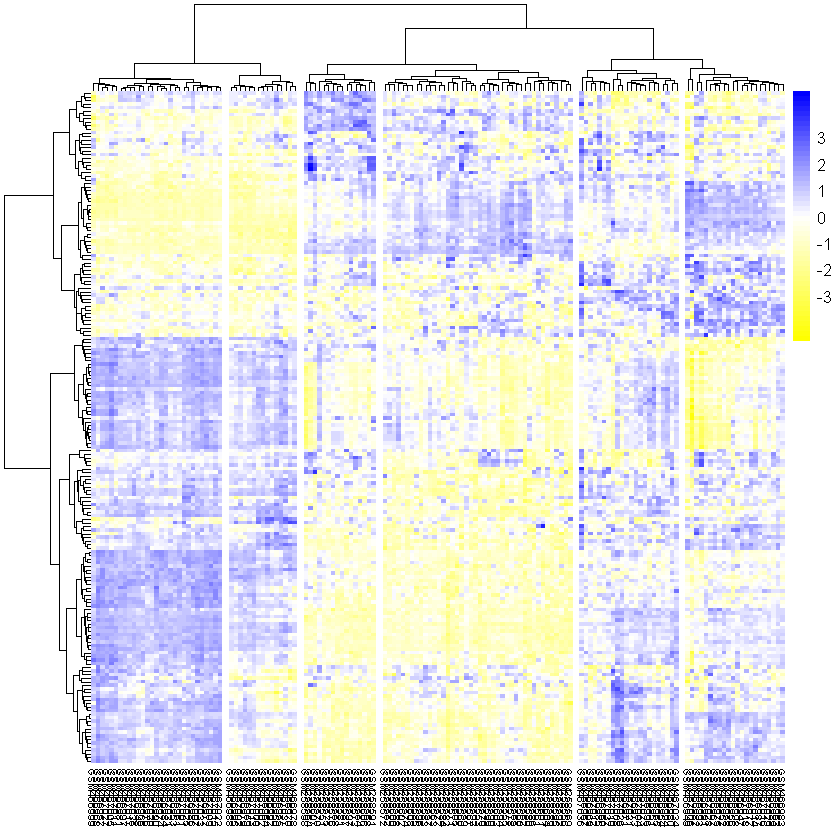

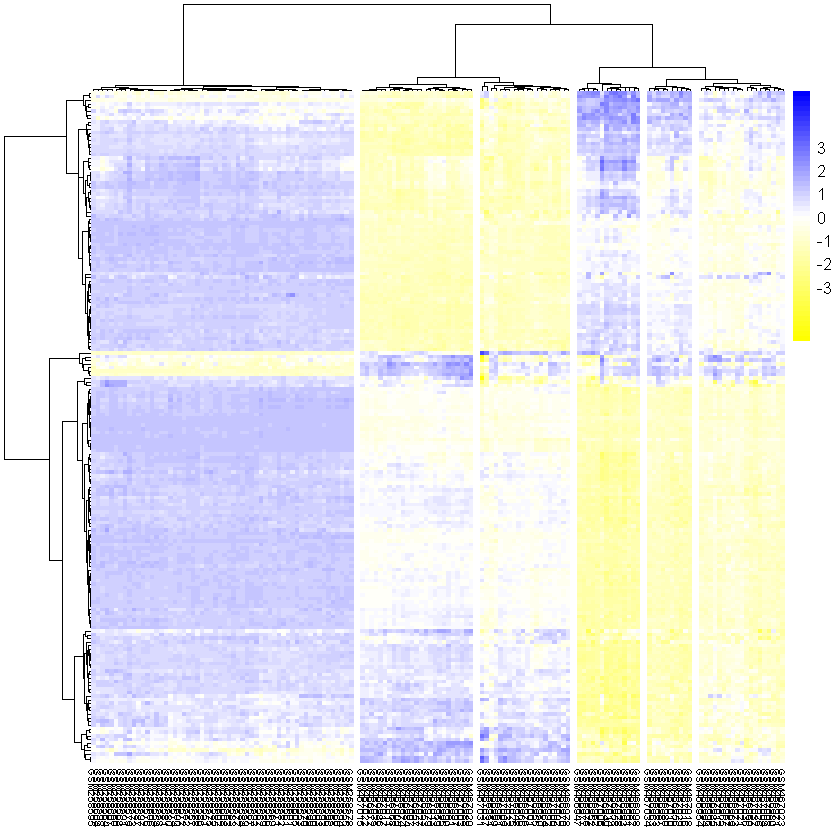

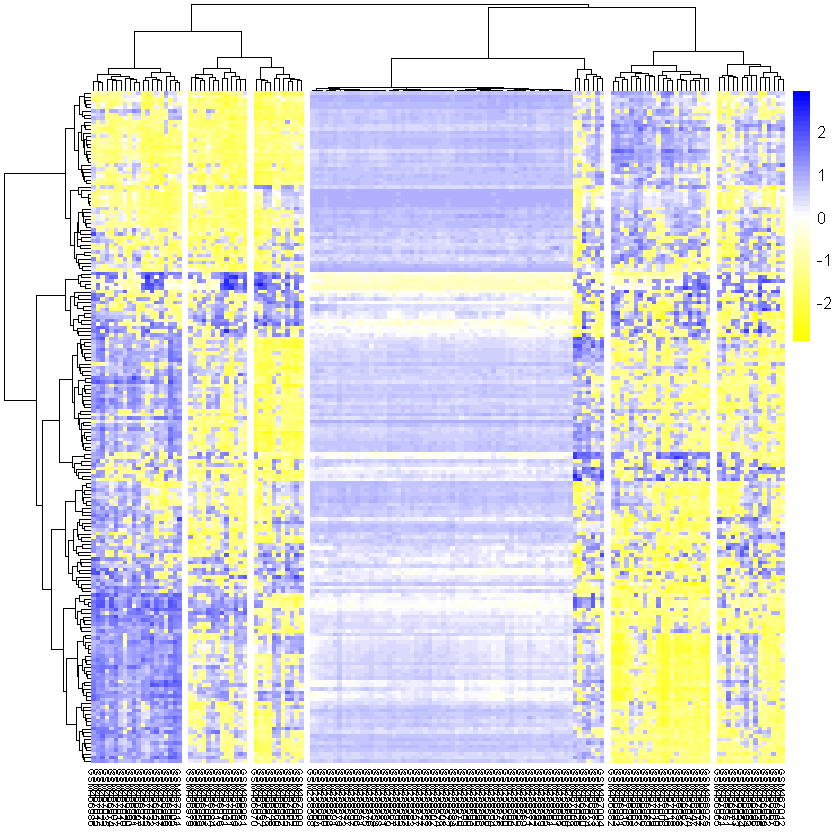

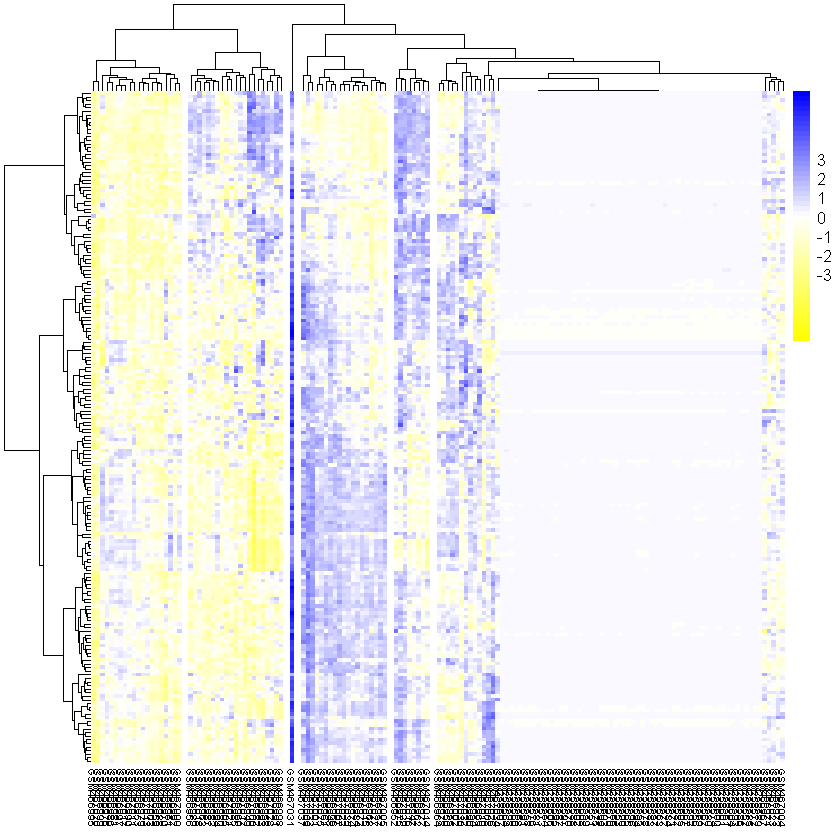

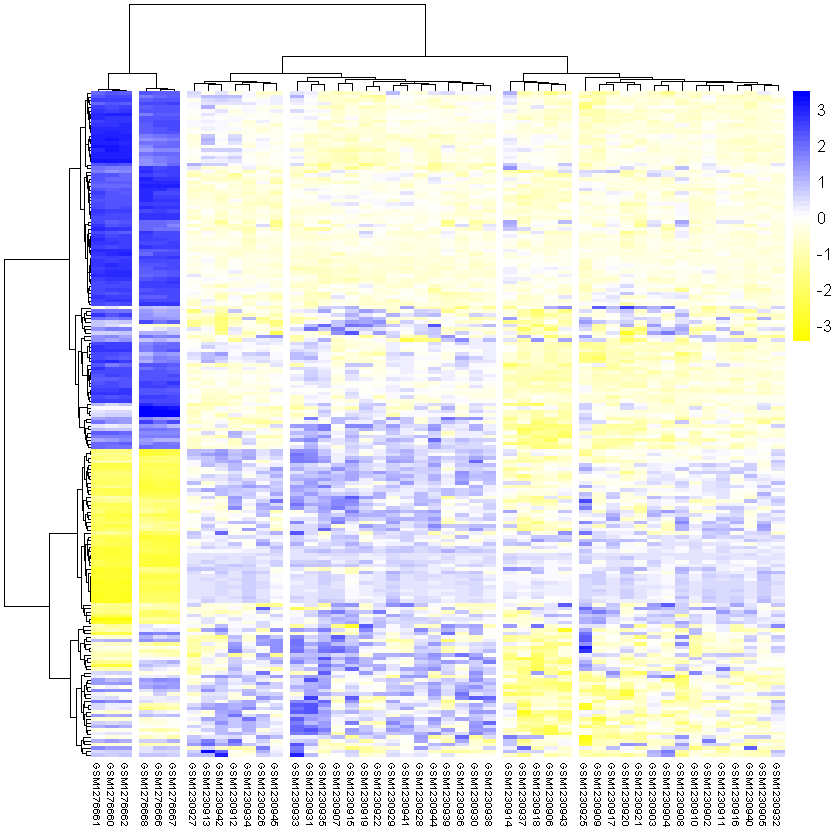

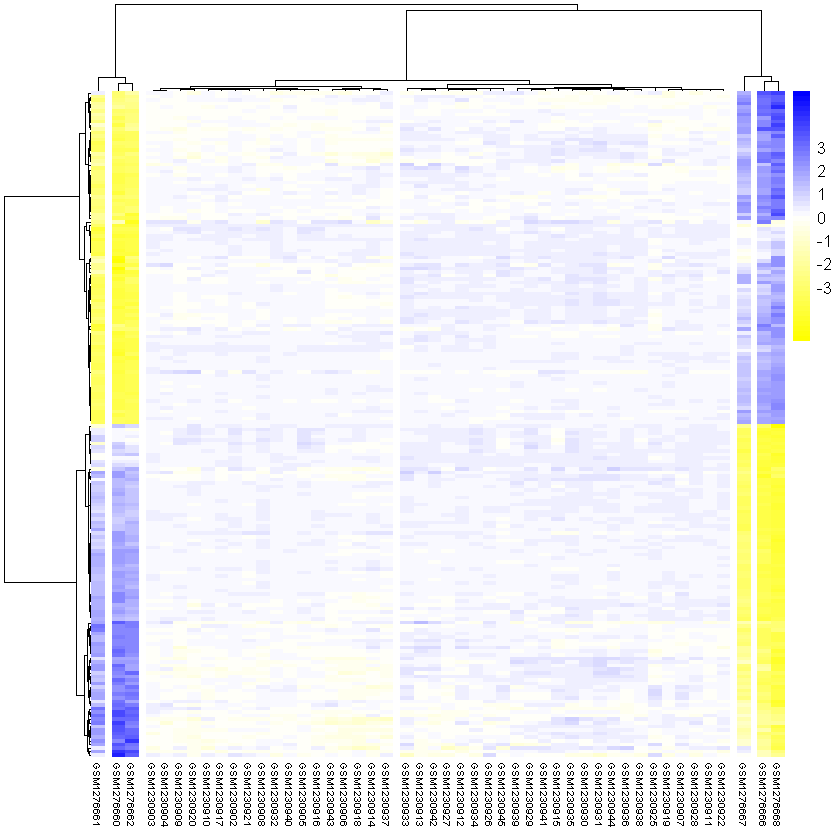

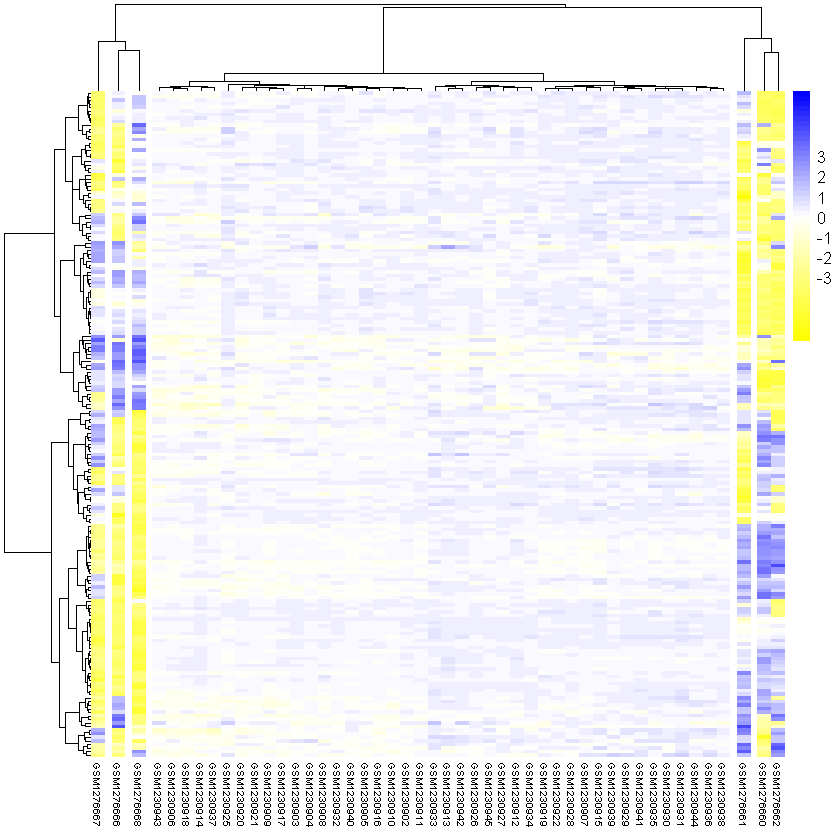

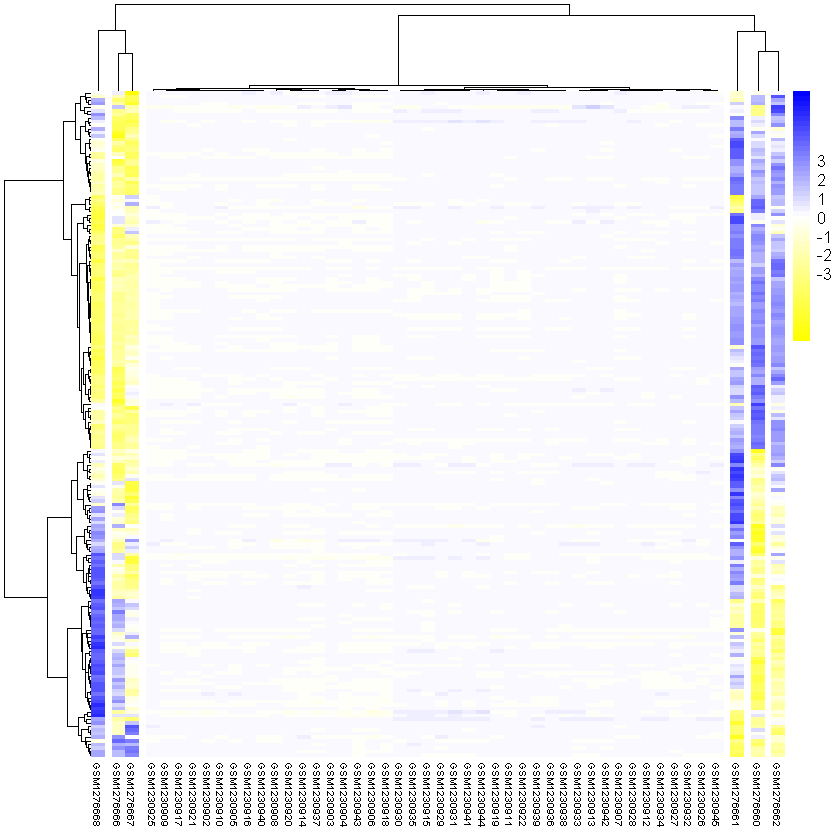

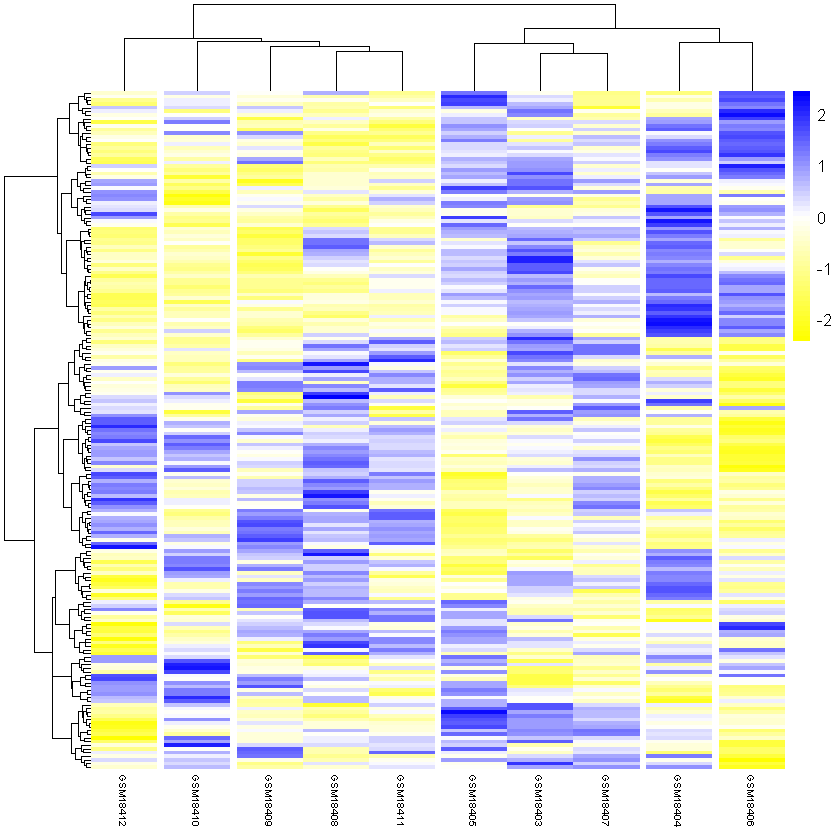

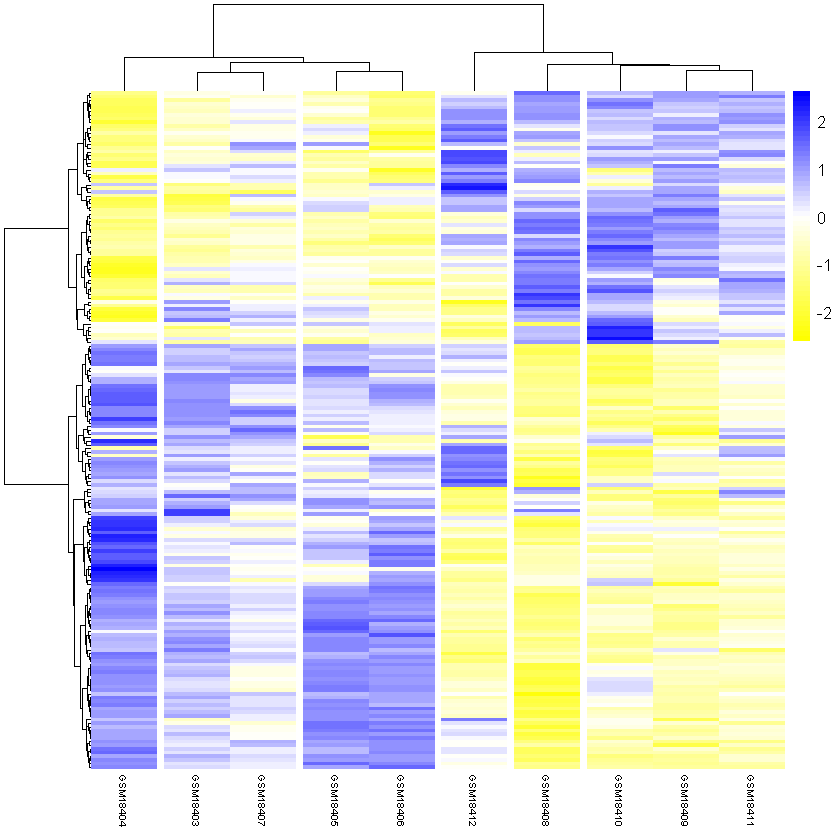

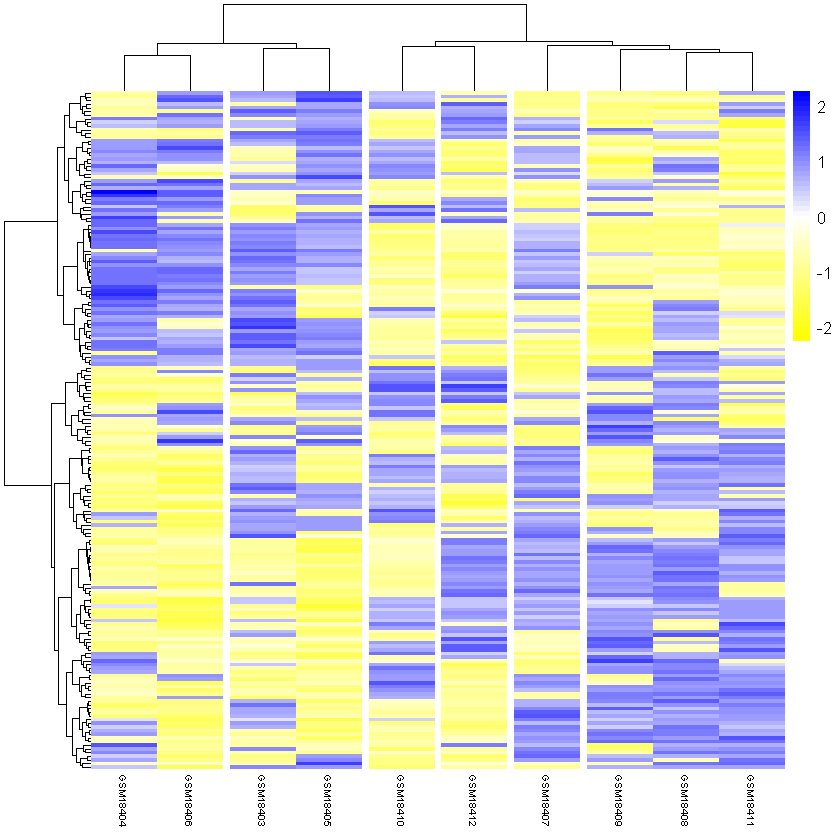

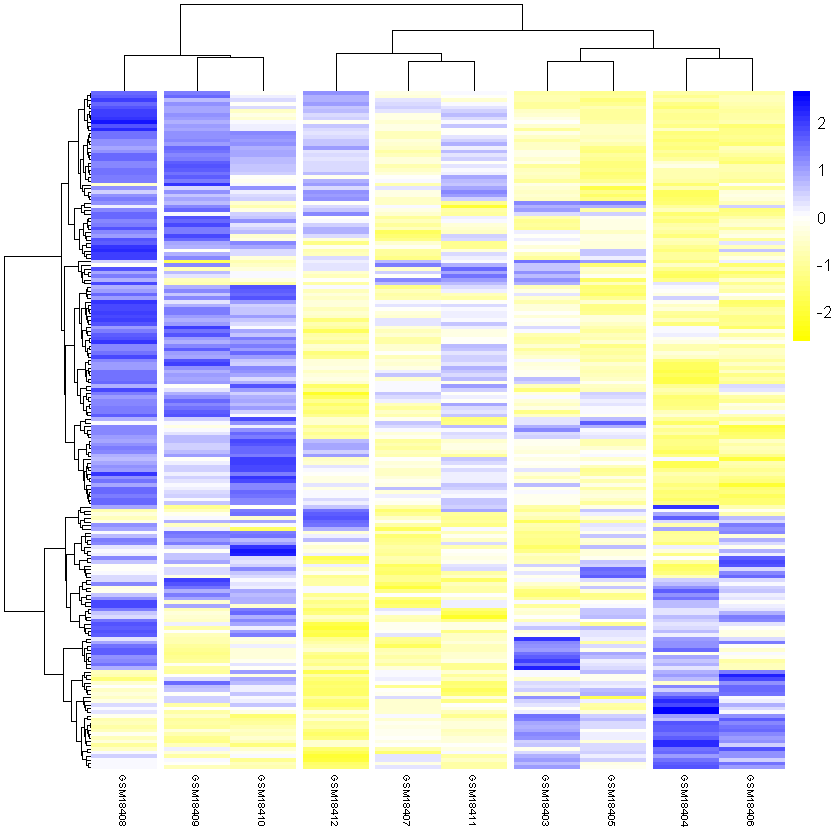

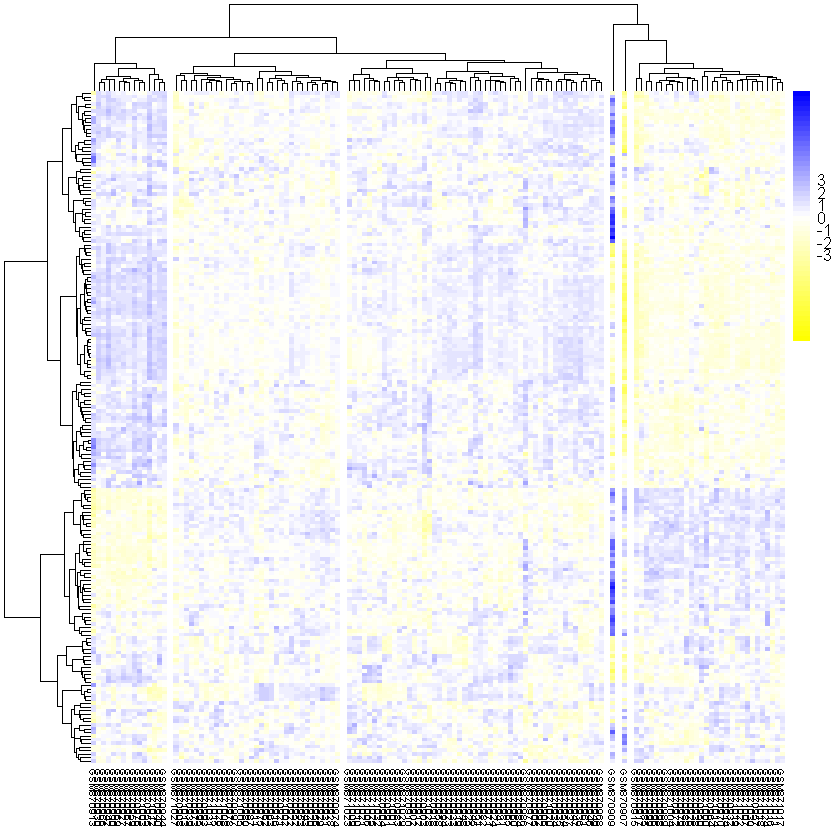

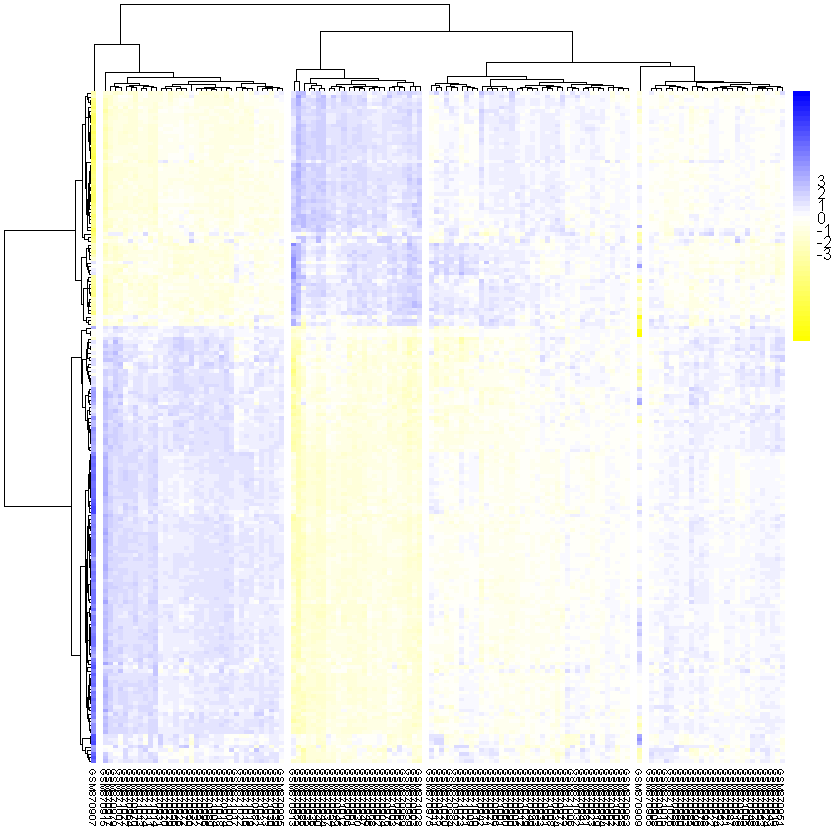

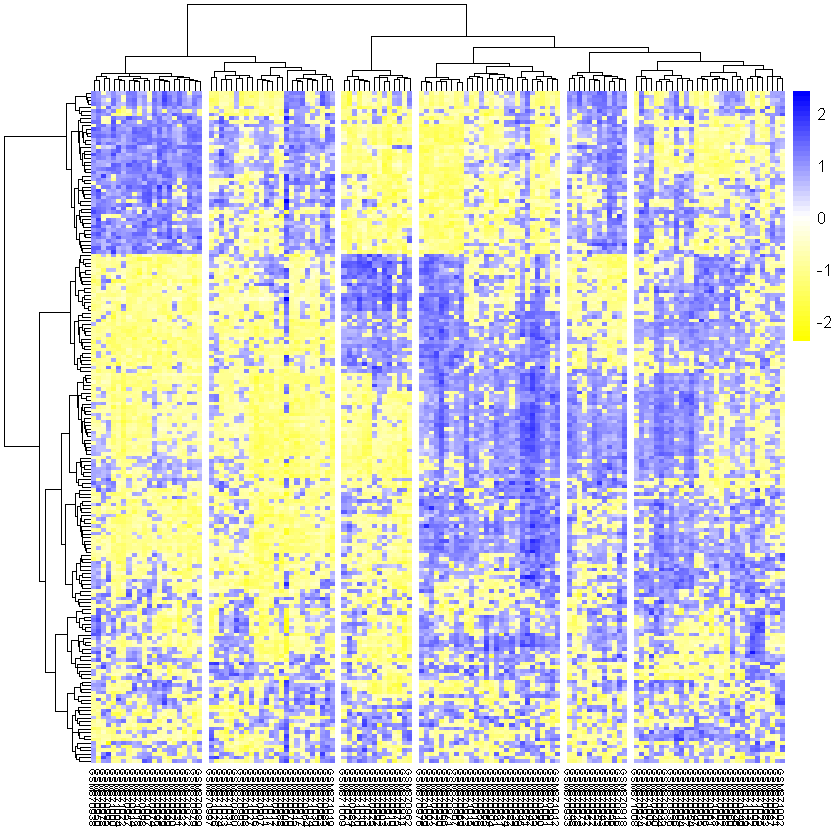

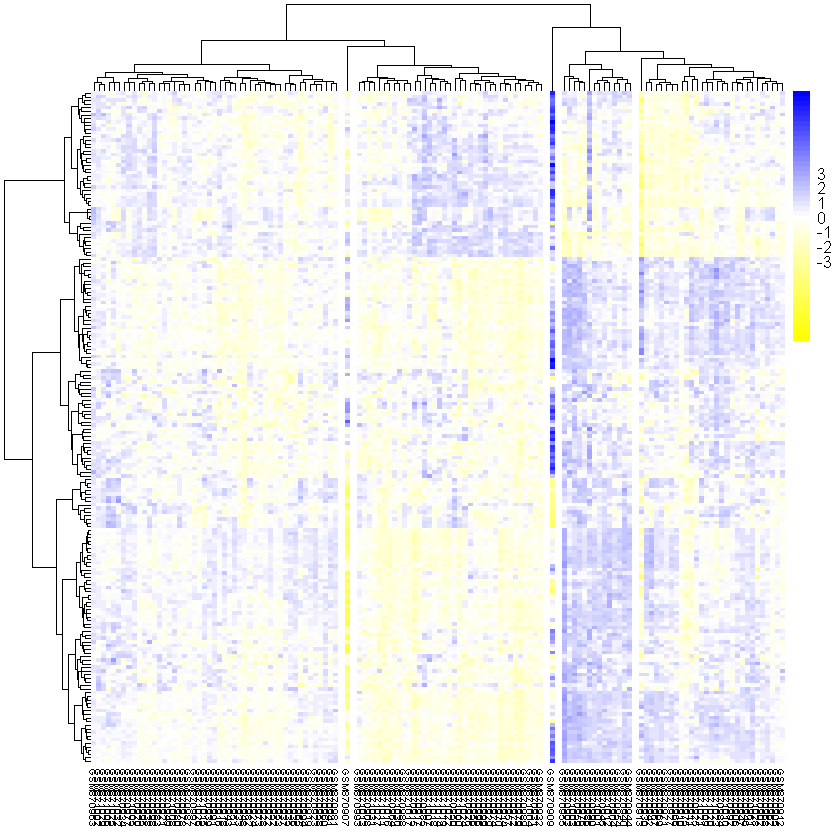

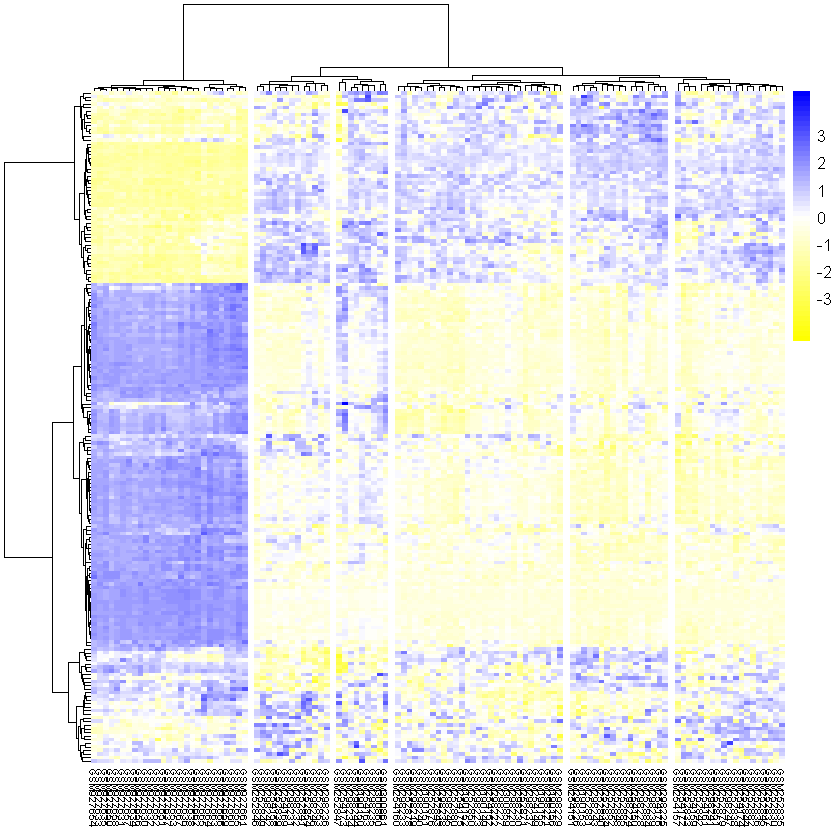

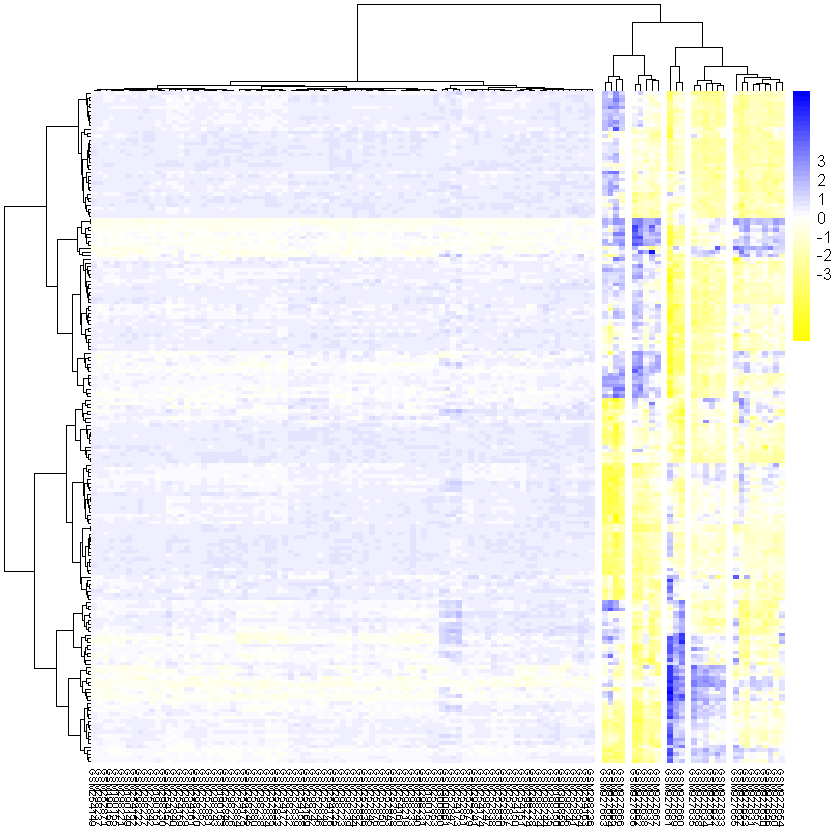

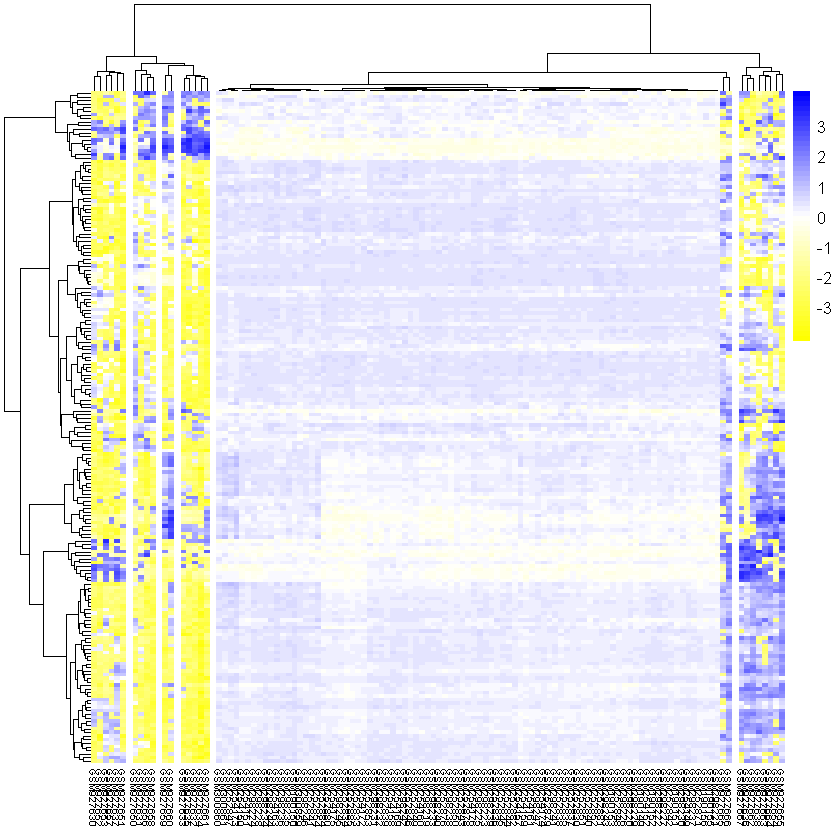

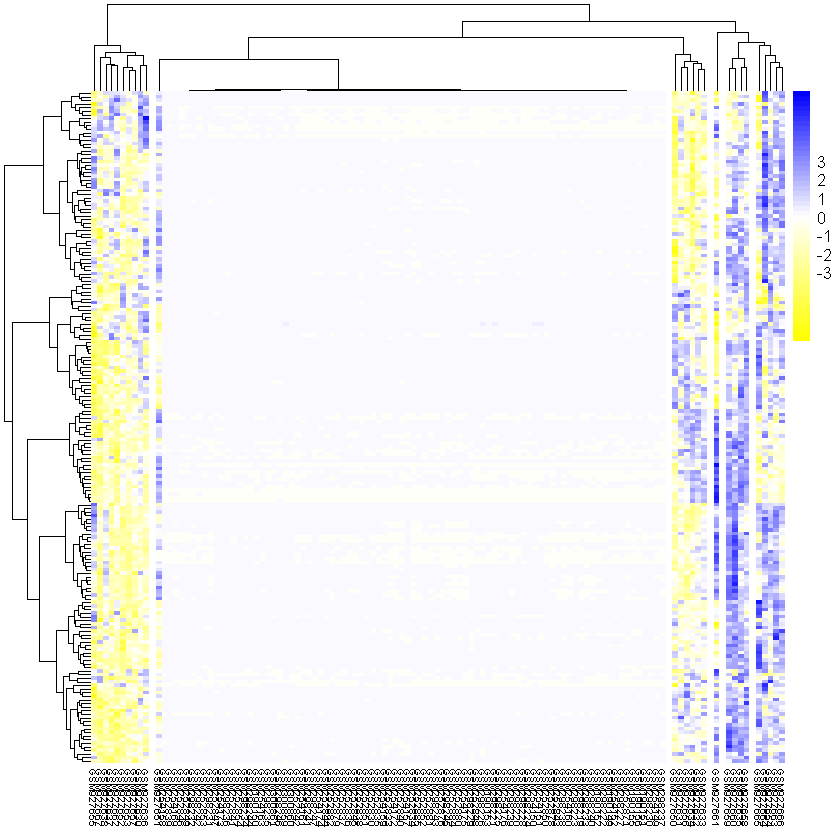

In [17]:
p_H00014_try = lapply(try_H00014, heatmap_cluster_gsva)
p_H00342_try = lapply(try_H00342, heatmap_cluster_gsva)
p_H01103_try = lapply(try_H01103, heatmap_cluster_gsva)
p_H00079_try = lapply(try_H00079, heatmap_cluster_gsva)
p_H01714_try = lapply(try_H01714, heatmap_cluster_gsva)

In [18]:
#### choose significant pathways of each cluster
####p_H00342$result.ssgsea
#######methods:
#######value <= 0.05 of each sample
####1. subset 
p_H00014.n = list()
p_H00014.n$result.ssgsea_sample = p_H00014$result.ssgsea[,-1]
p_H00014.n$result.gsva_sample = p_H00014$result.gsva[,-1]
p_H00014.n$result.plage_sample = p_H00014$result.plage[,-1]
p_H00014.n$result.zscore_sample = p_H00014$result.zscore[,-1]
H00014_cluster_ssgsea = list("cluster1" = p_H00014.n$result.ssgsea_sample[, 1:29],
                             "cluster2" = p_H00014.n$result.ssgsea_sample[, 30:44],
                             "cluster3" = p_H00014.n$result.ssgsea_sample[, 45:60],
                             "cluster4" = p_H00014.n$result.ssgsea_sample[, 61:102],
                             "cluster5" = p_H00014.n$result.ssgsea_sample[, 103:124],
                             "cluster6" = p_H00014.n$result.ssgsea_sample[, 125:146])
H00014_cluster_gsva = list("cluster1" = p_H00014.n$result.gsva_sample[, 1:20],
                           "cluster2" = p_H00014.n$result.gsva_sample[, 21:33],
                           "cluster3" = p_H00014.n$result.gsva_sample[, 34:44],
                           "cluster4" = p_H00014.n$result.gsva_sample[, 45:109],
                           "cluster5" = p_H00014.n$result.gsva_sample[, 110:131],
                           "cluster6" = p_H00014.n$result.gsva_sample[, 132:146])
H00014_cluster_plage = list("cluster1" = p_H00014.n$result.plage_sample[, 1:58],
                            "cluster2" = p_H00014.n$result.plage_sample[, 59:83],
                            "cluster3" = p_H00014.n$result.plage_sample[, 84:103],
                            "cluster4" = p_H00014.n$result.plage_sample[, 104:117],
                            "cluster5" = p_H00014.n$result.plage_sample[, 118:127],
                            "cluster6" = p_H00014.n$result.plage_sample[, 128:146])
H00014_cluster_zscore = list("cluster1" = p_H00014.n$result.zscore_sample[, 1:20],
                             "cluster2" = p_H00014.n$result.zscore_sample[, 21:41],
                             "cluster3" = p_H00014.n$result.zscore_sample[, 42],
                             "cluster4" = p_H00014.n$result.zscore_sample[, 43:61],
                             "cluster5" = p_H00014.n$result.zscore_sample[, 62:69],
                             "cluster6" = p_H00014.n$result.zscore_sample[, 70:146])